In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

# Directorio con los archivos pkl
pkl_dir = Path('Data/bam_2')

# Lista para almacenar los resultados
results = []

# Analizar cada archivo pkl
for pkl_file in pkl_dir.glob('*.pkl'):
    try:
        with open(pkl_file, 'rb') as f:
            matrix = pickle.load(f)
            
        # Convertir a numpy array si no lo es
        if not isinstance(matrix, np.ndarray):
            matrix = np.array(matrix)
            
        # Calcular estadísticas
        total_elements = matrix.size
        zeros = np.sum(matrix == 0)
        zero_percentage = (zeros / total_elements) * 100
        
        results.append({
            'file_name': pkl_file.name,
            'total_elements': total_elements,
            'zeros': zeros,
            'zero_percentage': zero_percentage,
            'matrix_shape': matrix.shape
        })
        
    except Exception as e:
        print(f"Error procesando {pkl_file.name}: {str(e)}")

# Crear DataFrame con los resultados
df_results = pd.DataFrame(results)

# Mostrar resultados
print("\nResumen de análisis de matrices:")
print("-" * 50)
print(f"Total de archivos analizados: {len(df_results)}")
print(f"\nEstadísticas de porcentaje de ceros:")
print(df_results['zero_percentage'].describe())

# Mostrar los 5 archivos con más ceros
print("\nTop 5 archivos con más ceros:")
print(df_results.nlargest(5, 'zero_percentage')[['file_name', 'zero_percentage', 'zeros', 'total_elements']])

# Mostrar los 5 archivos con menos ceros
print("\nTop 5 archivos con menos ceros:")
print(df_results.nsmallest(5, 'zero_percentage')[['file_name', 'zero_percentage', 'zeros', 'total_elements']])


Resumen de análisis de matrices:
--------------------------------------------------
Total de archivos analizados: 7049

Estadísticas de porcentaje de ceros:
count    7049.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: zero_percentage, dtype: float64

Top 5 archivos con más ceros:
       file_name  zero_percentage  zeros  total_elements
0  B70352406.pkl              0.0      0               1
1  B10569978.pkl              0.0      0               1
2  B73703688.pkl              0.0      0               1
3  B80372006.pkl              0.0      0               1
4  B40148629.pkl              0.0      0               1

Top 5 archivos con menos ceros:
       file_name  zero_percentage  zeros  total_elements
0  B70352406.pkl              0.0      0               1
1  B10569978.pkl              0.0      0               1
2  B73703688.pkl              0.0      0               1
3  B80372006.pkl              0.0      0  

B40148629.pkl contiene dict con claves: [np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018)]
  -> Usando clave '2009' con matriz de forma (28, 28)
B62724562.pkl contiene dict con claves: [np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018)]
  -> Usando clave '2009' con matriz de forma (28, 28)
B11085198.pkl contiene dict con claves: [np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018)]
  -> Usando clave '2009' con matriz de forma (28, 28)
B54835137.pkl contiene dict con claves: [np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018)]
  -> Usando clave '2009' con matri

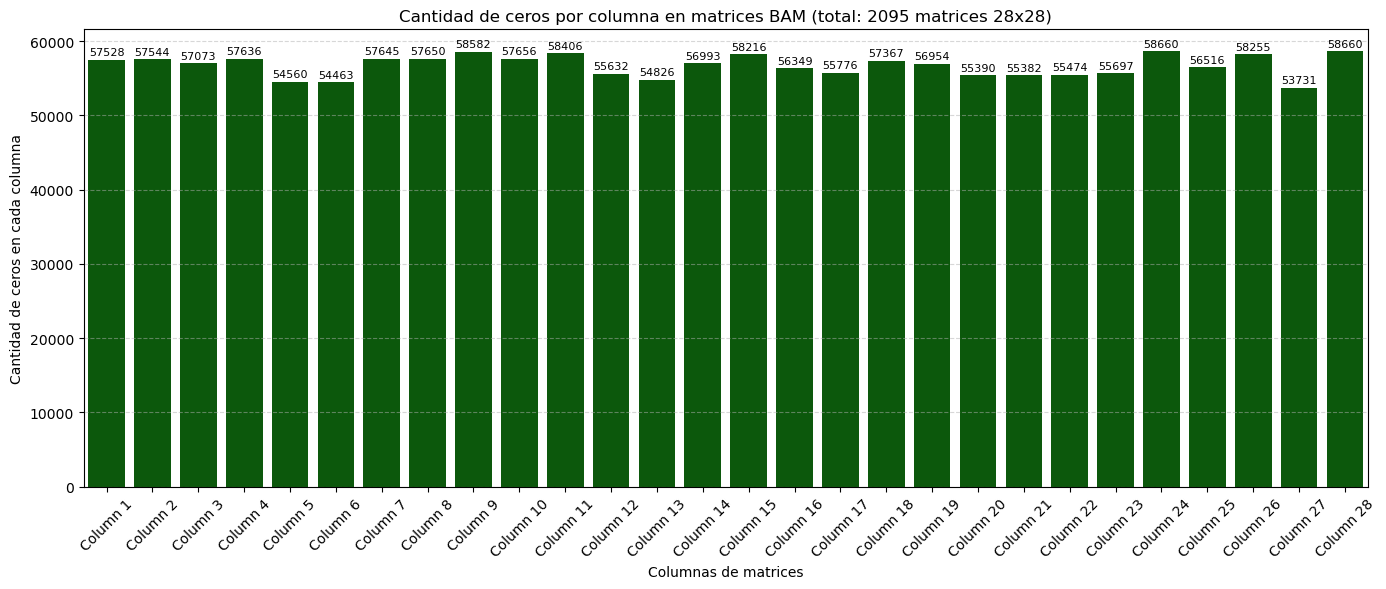

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Directorio con los archivos pkl
pkl_dir = Path('Data/bam_1')

# Lista para almacenar los resultados
results = []
zeros_per_column = np.zeros(28, dtype=int)  # Acumulador por columna
matrix_count = 0  # Contador de matrices válidas

# Analizar cada archivo pkl
for pkl_file in pkl_dir.glob('*.pkl'):
    try:
        with open(pkl_file, 'rb') as f:
            obj = pickle.load(f)

        matrix = None

        if isinstance(obj, pd.DataFrame):
            matrix = obj.values

        elif isinstance(obj, np.ndarray):
            matrix = obj

        elif isinstance(obj, dict):
            print(f"{pkl_file.name} contiene dict con claves: {list(obj.keys())}")
            for key, value in obj.items():
                if isinstance(value, (np.ndarray, pd.DataFrame)) and np.ndim(value) == 2:
                    matrix = value.values if isinstance(value, pd.DataFrame) else value
                    print(f"  -> Usando clave '{key}' con matriz de forma {matrix.shape}")
                    break
            if matrix is None:
                raise ValueError("No se encontró ninguna matriz válida en el dict.")
        else:
            raise ValueError(f"Formato inesperado: {type(obj)}")

        # Calcular estadísticas si se ha obtenido una matriz
        total_elements = matrix.size
        zeros = np.sum(matrix == 0)
        zero_percentage = (zeros / total_elements) * 100

        results.append({
            'file_name': pkl_file.name,
            'total_elements': total_elements,
            'zeros': zeros,
            'zero_percentage': zero_percentage,
            'matrix_shape': matrix.shape
        })

        # Acumular ceros por columna si la matriz es 28x28
        if matrix.shape == (28, 28):
            zeros_per_column += np.sum(matrix == 0, axis=0)
            matrix_count += 1

    except Exception as e:
        print(f"Error procesando {pkl_file.name}: {str(e)}")

# Crear DataFrame con los resultados
df_results = pd.DataFrame(results)

# Mostrar resumen
print("\nResumen de análisis de matrices:")
print("-" * 50)
print(f"Total de archivos analizados: {len(df_results)}")

if not df_results.empty:
    print(f"\nEstadísticas de porcentaje de ceros:")
    print(df_results['zero_percentage'].describe())

    print("\nTop 5 archivos con más ceros:")
    print(df_results.nlargest(5, 'zero_percentage')[['file_name', 'zero_percentage', 'zeros', 'total_elements']])

    print("\nTop 5 archivos con menos ceros:")
    print(df_results.nsmallest(5, 'zero_percentage')[['file_name', 'zero_percentage', 'zeros', 'total_elements']])
else:
    print("No se encontraron matrices válidas en los archivos analizados.")

# Si se procesaron matrices 28x28, graficar ceros por columna
if matrix_count > 0:
    df_zeros = pd.DataFrame({
        'Column': [f'Column {i+1}' for i in range(28)],
        'Zeros': zeros_per_column
    })

    plt.figure(figsize=(14, 6))
    barplot = sns.barplot(x='Column', y='Zeros', data=df_zeros, color='darkgreen')

    for index, row in df_zeros.iterrows():
        barplot.text(index, row['Zeros'] + max(df_zeros['Zeros']) * 0.01, f"{row['Zeros']}", 
                     color='black', ha="center", fontsize=8)

    plt.title(f'Cantidad de ceros por columna en matrices BAM (total: {matrix_count} matrices 28x28)')
    plt.xlabel('Columnas de matrices')
    plt.ylabel('Cantidad de ceros en cada columna')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

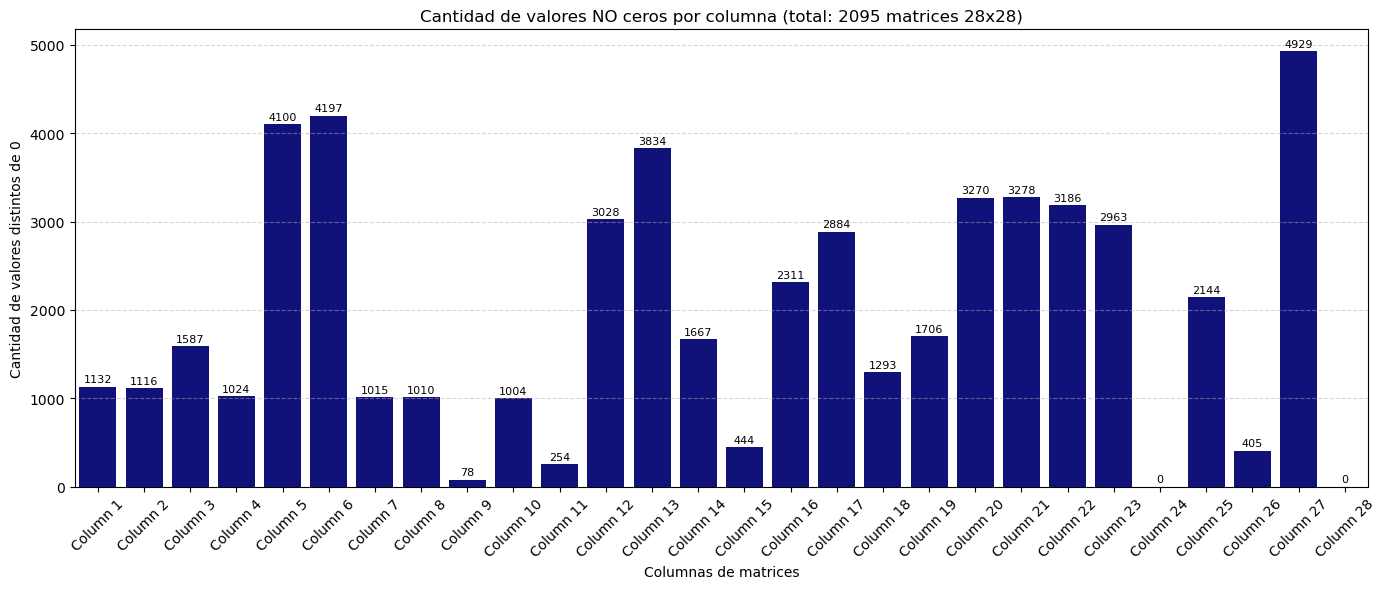

In [3]:
# Calcular número total de valores posibles por columna
total_por_columna = matrix_count * 28
non_zeros_per_column = total_por_columna - zeros_per_column

# Crear DataFrame para graficar
df_non_zeros = pd.DataFrame({
    'Column': [f'Column {i+1}' for i in range(28)],
    'Non-zeros': non_zeros_per_column
})

# Crear gráfico
plt.figure(figsize=(14, 6))
barplot = sns.barplot(x='Column', y='Non-zeros', data=df_non_zeros, color='darkblue')

# Añadir etiquetas
for index, row in df_non_zeros.iterrows():
    barplot.text(index, row['Non-zeros'] + max(df_non_zeros['Non-zeros']) * 0.01, 
                 f"{row['Non-zeros']}", color='black', ha="center", fontsize=8)

plt.title(f'Cantidad de valores NO ceros por columna (total: {matrix_count} matrices 28x28)')
plt.xlabel('Columnas de matrices')
plt.ylabel('Cantidad de valores distintos de 0')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Columna 24 vacía (sin valores distintos de cero)
Columna 28 vacía (sin valores distintos de cero)


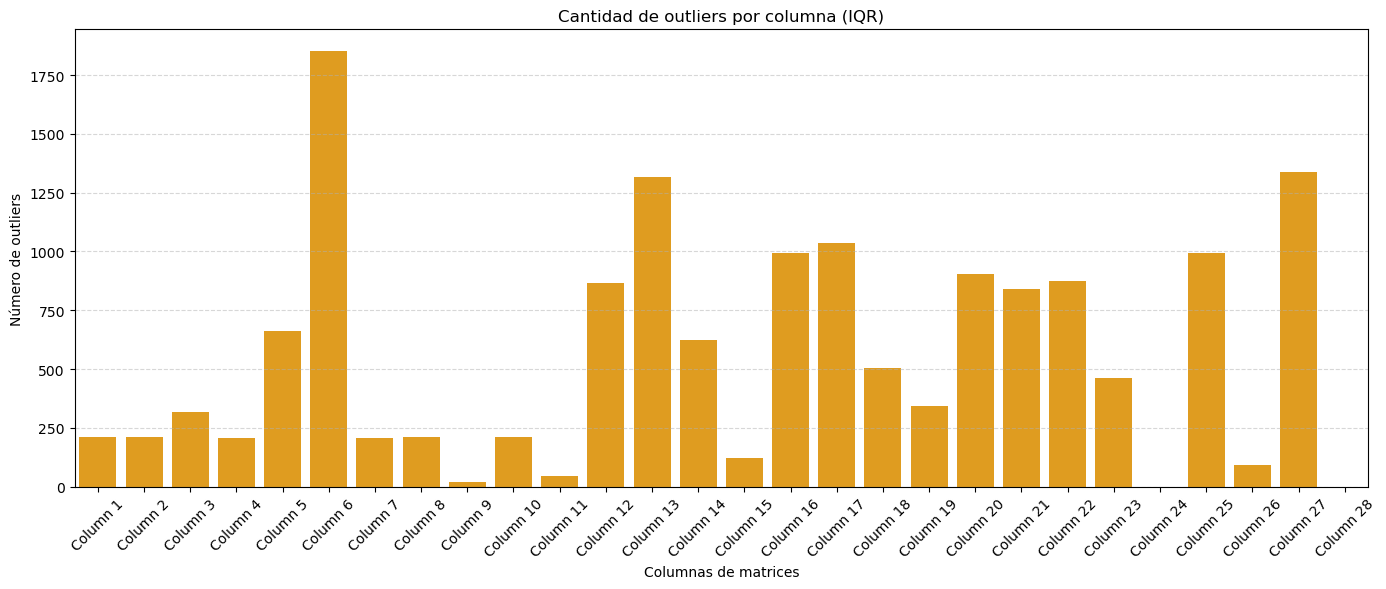

In [4]:
from collections import defaultdict

# Acumulador de valores por columna (solo no ceros)
column_values = defaultdict(list)

# Leer matrices otra vez para recolectar valores no cero por columna
for pkl_file in pkl_dir.glob('*.pkl'):
    try:
        with open(pkl_file, 'rb') as f:
            obj = pickle.load(f)

        matrix = None
        if isinstance(obj, dict):
            sorted_keys = sorted(obj.keys())
            for year in reversed(sorted_keys):
                value = obj[year]
                if isinstance(value, (np.ndarray, pd.DataFrame)) and value.shape == (28, 28):
                    matrix = value.values if isinstance(value, pd.DataFrame) else value
                    break

        if matrix is not None:
            for col_idx in range(28):
                non_zero_vals = matrix[:, col_idx][matrix[:, col_idx] != 0]
                column_values[col_idx].extend(non_zero_vals)

    except:
        continue

# Detectar outliers con IQR
outliers_per_column = {}

foutliers_per_column = {}

for col_idx, values in column_values.items():
    values = np.array(values)
    
    if values.size == 0:
        print(f"Columna {col_idx+1} vacía (sin valores distintos de cero)")
        outliers_per_column[f'Column {col_idx+1}'] = 0
        continue

    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = values[(values < lower_bound) | (values > upper_bound)]
    outliers_per_column[f'Column {col_idx+1}'] = len(outliers)

# Visualizar cantidad de outliers por columna
df_outliers = pd.DataFrame({
    'Column': list(outliers_per_column.keys()),
    'Outliers': list(outliers_per_column.values())
})

plt.figure(figsize=(14, 6))
sns.barplot(x='Column', y='Outliers', data=df_outliers, color='orange')
plt.title('Cantidad de outliers por columna (IQR)')
plt.xlabel('Columnas de matrices')
plt.ylabel('Número de outliers')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuración ---
# Ruta al directorio donde están los archivos BAM
pkl_dir = Path('Data/bam_2')

# NIF de la empresa que quieres visualizar
nif = ''  # <-- Cambia esto por el NIF deseado

# Construir la ruta al archivo correspondiente
archivo = pkl_dir / f"{nif.upper()}.pkl"

if not archivo.exists():
    print(f"No se encontró ningún archivo para el NIF {nif}")
else:
    with open(archivo, 'rb') as f:
        data = pickle.load(f)

    # Suponemos que es un dict con claves por año
    if isinstance(data, dict):
        # Tomar el año más reciente
        anio = max(data.keys())
        matriz = data[anio]
        if isinstance(matriz, pd.DataFrame):
            matriz = matriz.values

        print(f"Visualizando matriz de la empresa {nif}, año {anio}, forma {matriz.shape}")

        # Visualización
        plt.figure(figsize=(8, 6))
        plt.imshow(matriz, cmap='viridis', aspect='auto')
        plt.colorbar(label='Valor')
        plt.title(f'Matriz BAM - Empresa {nif} - Año {anio}')
        plt.xlabel('Columnas')
        plt.ylabel('Filas')
        plt.tight_layout()
        plt.show()

    else:
        print("El archivo no contiene un diccionario con matrices por año.")

No se encontró ningún archivo para el NIF 
